# Topic 2: Recommendation System
### Demo: Gemsim, Cosin Similarity

In [4]:
# !pip install gensim

In [5]:
# !pip install pyvi

In [6]:
from pyvi import ViTokenizer

s = "Tôi yêu thành phố Hồ Chí Minh"
print(ViTokenizer.tokenize(s))

Tôi yêu thành_phố Hồ_Chí_Minh


In [7]:
# Note: Có thể tùy chọn các thư việc xử lý tiếng Việt

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity
# from underthesea import word_tokenize, pos_tag, sent_tokenize
from pyvi.ViTokenizer import tokenize
import warnings
from gensim import corpora, models, similarities
import re

In [9]:
# from google.colab import drive
# drive.mount("/content/gdrive", force_remount=True)

In [10]:
# %cd '/content/gdrive/MyDrive/LDS0/Khoa_308/Project_2_ContentBased_Segmentation/demo'

In [11]:
STOP_WORD_FILE = 'files/vietnamese-stopwords.txt'

In [12]:
with open(STOP_WORD_FILE, 'r', encoding='utf-8') as file:
    stop_words = file.read()

stop_words = stop_words.split('\n')

In [13]:
# Đọc file excel abc.xlsx
df = pd.read_excel('mau_xe_may.xlsx')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           10 non-null     int64 
 1   title        10 non-null     object
 2   description  10 non-null     object
dtypes: int64(1), object(2)
memory usage: 368.0+ bytes


In [15]:
df.head()

,id,title,description
0,1,"Bán Vespa Sprint 125cc 2024 xanh dương, xe đẹp...",Bán xe #Vespa Sprint 125cc. Mua mới tại #Topco...
1,2,bán cup125 xe như mới đầy đủ phụ kiện theo xe mới,bán cup125 xe như mới đầy đủ phụ kiện theo xe ...
2,3,Bán Xe Vespa Sprint gấp giá rẻ,Xe Vespa Piggio Sprint 2019 mới 99%\nXe nữ chạ...
3,4,Wave hàn còn mới giá rẻ cho ae,"Wave hàn bstp, xe còn mới, giấy tờ đầy đủ"
4,5,CHÍNH CHỦ Cần bán Yamaha Exciter 2014 không côn,"Xe Yamaha Exciter không côn tay 4 số, máy êm, ..."


In [16]:
# Tạo nội dung tổng hợp
# Lựa chọn các thông tin cần thiết để đưa vào phần content (giúp đề xuất nội dung)
# Có thể 1 cột hoặc nhiều cột thông tin
# ví dụ ở đây là chọn 1 cột, và chỉ lấy 200 từ đầu tiên trong phần mô tả (dễ quan sát khi làm demo)
df['Content'] = df['description'].apply(lambda x: ' '.join(x.split()[:200]))

In [17]:
df.head()

,id,title,description,Content
0,1,"Bán Vespa Sprint 125cc 2024 xanh dương, xe đẹp...",Bán xe #Vespa Sprint 125cc. Mua mới tại #Topco...,Bán xe #Vespa Sprint 125cc. Mua mới tại #Topco...
1,2,bán cup125 xe như mới đầy đủ phụ kiện theo xe mới,bán cup125 xe như mới đầy đủ phụ kiện theo xe ...,bán cup125 xe như mới đầy đủ phụ kiện theo xe ...
2,3,Bán Xe Vespa Sprint gấp giá rẻ,Xe Vespa Piggio Sprint 2019 mới 99%\nXe nữ chạ...,Xe Vespa Piggio Sprint 2019 mới 99% Xe nữ chạy...
3,4,Wave hàn còn mới giá rẻ cho ae,"Wave hàn bstp, xe còn mới, giấy tờ đầy đủ","Wave hàn bstp, xe còn mới, giấy tờ đầy đủ"
4,5,CHÍNH CHỦ Cần bán Yamaha Exciter 2014 không côn,"Xe Yamaha Exciter không côn tay 4 số, máy êm, ...","Xe Yamaha Exciter không côn tay 4 số, máy êm, ..."


In [18]:
# word_tokenize
df["Content_wt"]=df["Content"].apply(lambda x: tokenize(x))

In [19]:
df[["Content", "Content_wt"]].head(2)

,Content,Content_wt
0,Bán xe #Vespa Sprint 125cc. Mua mới tại #Topco...,Bán xe # Vespa Sprint 125cc . Mua mới tại # To...
1,bán cup125 xe như mới đầy đủ phụ kiện theo xe ...,bán cup125 xe như mới đầy_đủ phụ_kiện theo xe ...


In [20]:
import re

# Cosine_similarity
- link https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.cosine_similarity.html
- link https://en.wikipedia.org/wiki/Cosine_similarity
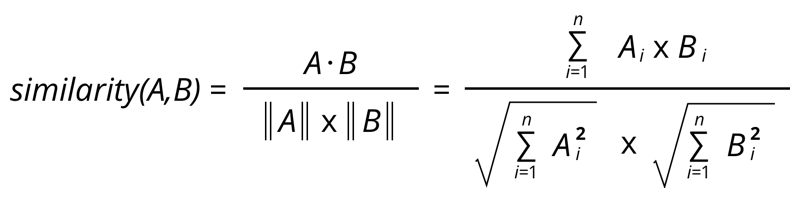

In [21]:
from numpy import dot
from numpy.linalg import norm
A = [1,2]
B = [2,2]
cos_sim = dot(A,B) / (norm(A)*norm(B))
print(cos_sim)

0.9486832980505138


In [22]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Vector hóa nội dung
vectorizer = TfidfVectorizer(analyzer='word', stop_words=stop_words)
tfidf_matrix = vectorizer.fit_transform(df['Content_wt'])

# Tính toán độ tương đồng
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

In [23]:
df_show = pd.DataFrame(cosine_sim)
df_show

,0,1,2,3,4,5,6,7,8,9
0,1.000000,0.111123,0.182255,0.039888,0.062031,0.044335,0.052056,0.053182,0.050309,0.052837
1,0.111123,1.000000,0.125436,0.116272,0.298885,0.168099,0.089291,0.134394,0.034553,0.054964
2,0.182255,0.125436,1.000000,0.051847,0.196937,0.163725,0.029002,0.102560,0.000000,0.045063
3,0.039888,0.116272,0.051847,1.000000,0.094711,0.048063,0.157786,0.069923,0.073308,0.024059
4,0.062031,0.298885,0.196937,0.094711,1.000000,0.224117,0.077494,0.169324,0.050898,0.037415
5,0.044335,0.168099,0.163725,0.048063,0.224117,1.000000,0.026885,0.077719,0.000000,0.026741
6,0.052056,0.089291,0.029002,0.157786,0.077494,0.026885,1.000000,0.100615,0.041007,0.043110
7,0.053182,0.134394,0.102560,0.069923,0.169324,0.077719,0.100615,1.000000,0.107045,0.060922
8,0.050309,0.034553,0.000000,0.073308,0.050898,0.000000,0.041007,0.107045,1.000000,0.086742
9,0.052837,0.054964,0.045063,0.024059,0.037415,0.026741,0.043110,0.060922,0.086742,1.000000


In [24]:
# Hàm đề xuất xe
# # với mỗi xe, lấy nums xe tương quan nhất
def get_recommendations(id, cosine_sim=cosine_sim, nums=5):
    idx = df.index[df['id'] == id][0]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:nums+1]  # Lấy 5 xe tương tự nhất
    hotel_indices = [i[0] for i in sim_scores]
    return df['title'].iloc[hotel_indices]

In [25]:
# Gọi function
recommendations = get_recommendations(1)
print(recommendations)

2                       Bán Xe Vespa Sprint gấp giá rẻ
1    bán cup125 xe như mới đầy đủ phụ kiện theo xe mới
4      CHÍNH CHỦ Cần bán Yamaha Exciter 2014 không côn
7          Nouvo 4 xe zin cục máy cực kỳ chất bao ngon
9                   Cần bán Vario 150cc 2017 chính chủ
Name: title, dtype: object


#### Lưu ma trận kết quả consin và đọc lên khi cần đề xuất

In [26]:
# Save cosine_sim to file
import pickle
with open('xe_cosine_sim_18112025.pkl', 'wb') as f:
    pickle.dump(cosine_sim, f)

# Open and read file to cosine_sim_new
with open('xe_cosine_sim_18112025.pkl', 'rb') as f:
    cosine_sim_new = pickle.load(f)
# cosine_sim_new

In [27]:
def get_recommendations(df, id, cosine_sim=cosine_sim, nums=5):
    # Get the index of the motobikes that matches the hotel_id
    matching_indices = df.index[df['id'] == id].tolist()
    if not matching_indices:
        print(f"No bike found with ID: {id}")
        return pd.DataFrame()  # Return an empty DataFrame if no match
    idx = matching_indices[0]

    # Get the pairwise similarity scores of all bikes with that bike
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the bikes based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 5 most similar bikes (Ignoring the bike itself)
    sim_scores = sim_scores[1:nums+1]

    # Get the bike indices
    bike_indices = [i[0] for i in sim_scores]

    # Return the top n most similar bikes as a DataFrame
    return df.iloc[bike_indices]

In [28]:
# Example usage (make sure to use a valid hotel_id from your DataFrame)
recommendations = get_recommendations(df, 1, cosine_sim=cosine_sim_new, nums=5)
recommendations

,id,title,description,Content,Content_wt
2,3,Bán Xe Vespa Sprint gấp giá rẻ,Xe Vespa Piggio Sprint 2019 mới 99%\nXe nữ chạ...,Xe Vespa Piggio Sprint 2019 mới 99% Xe nữ chạy...,Xe_Vespa Piggio_Sprint 2019 mới 99 % Xe_nữ chạ...
1,2,bán cup125 xe như mới đầy đủ phụ kiện theo xe mới,bán cup125 xe như mới đầy đủ phụ kiện theo xe ...,bán cup125 xe như mới đầy đủ phụ kiện theo xe ...,bán cup125 xe như mới đầy_đủ phụ_kiện theo xe ...
4,5,CHÍNH CHỦ Cần bán Yamaha Exciter 2014 không côn,"Xe Yamaha Exciter không côn tay 4 số, máy êm, ...","Xe Yamaha Exciter không côn tay 4 số, máy êm, ...","Xe_Yamaha Exciter không côn tay 4 số , máy êm ..."
7,8,Nouvo 4 xe zin cục máy cực kỳ chất bao ngon,- No4 bs 62 cà vẹc đầy đủ bao tranh chấp\n- Dà...,- No4 bs 62 cà vẹc đầy đủ bao tranh chấp - Dàn...,- No4 bs 62 cà vẹc đầy_đủ bao tranh_chấp - Dàn...
9,10,Cần bán Vario 150cc 2017 chính chủ,Xe chính chủ nguyên zin vừa bảo dưỡng cấp lớn ...,Xe chính chủ nguyên zin vừa bảo dưỡng cấp lớn ...,Xe chính chủ nguyên zin vừa bảo_dưỡng cấp lớn ...


# Gensim

In [29]:
# Tokenize(split) the sentences into words
content_gem = [[text for text in x.split()] for x in df.Content_wt]

In [30]:
len(content_gem)

10

In [31]:
content_gem[:1]

[['Bán',
  'xe',
  '#',
  'Vespa',
  'Sprint',
  '125cc',
  '.',
  'Mua',
  'mới',
  'tại',
  '#',
  'Topcom',
  '01',
  '/',
  '2024',
  ',',
  'Xe',
  'chính',
  'chủ',
  '.',
  'Chạy',
  'được',
  '14.000',
  'km',
  '.',
  'Giá',
  ':',
  '66tr',
  '(',
  'TL',
  ')',
  '.',
  'Anh',
  '/',
  'chị',
  'quan_tâm',
  'nhắn',
  'Zalo',
  'số',
  ':',
  '*',
  '*',
  '*',
  '.',
  'Công_chứng',
  'Hợp_đồng',
  'mua_bán',
  'trong',
  'ngày',
  '.']]

In [32]:
import re

In [33]:
# Tiền xử lý dữ liệu
content_gem_re = [[t.lower() for t in text if not t in ['', ' ', ',', '.', '...', '-',':', ';', '?', '%', '(', ')', '+', '/', "'", '&', '#', '*']] for text in  content_gem] # kiểm tra nội dung và đưa vào các ký tự đặc biệt
content_gem_re = [[t for t in text if not t in stop_words] for text in content_gem_re] # stopword
# Thực hiện các tiền xử lý khác...
# Nên viết phần tiền xử lý này vào function để có thể tái sử dụng khi cần

In [34]:
content_gem_re[:1]
# Có thể đưa content_gem_re này thành 1 cột của df để không mất công xử lý nhiều lần

[['xe',
  'vespa',
  'sprint',
  '125cc',
  'mua',
  'topcom',
  '01',
  '2024',
  'xe',
  'chủ',
  'chạy',
  '14.000',
  'km',
  'giá',
  '66tr',
  'tl',
  'nhắn',
  'zalo',
  'công_chứng',
  'hợp_đồng',
  'mua_bán']]

In [35]:
# Obtain the number of features based on dictionary: Use corpora.Dictionary
dictionary = corpora.Dictionary(content_gem_re)

In [36]:
# List of features in dictionary
dictionary.token2id

{'01': 0,
 '125cc': 1,
 '14.000': 2,
 '2024': 3,
 '66tr': 4,
 'chạy': 5,
 'chủ': 6,
 'công_chứng': 7,
 'giá': 8,
 'hợp_đồng': 9,
 'km': 10,
 'mua': 11,
 'mua_bán': 12,
 'nhắn': 13,
 'sprint': 14,
 'tl': 15,
 'topcom': 16,
 'vespa': 17,
 'xe': 18,
 'zalo': 19,
 'ae': 20,
 'bso': 21,
 'cavet': 22,
 'cup125': 23,
 'fix': 24,
 'học': 25,
 'nhượng': 26,
 'nhẹ': 27,
 'phụ_kiện': 28,
 'thoải_mái': 29,
 'uỷ_quyền': 30,
 'xanh': 31,
 'đam_mê': 32,
 'đen': 33,
 'đi': 34,
 'đầy_đủ': 35,
 'đẹp': 36,
 'để_dành': 37,
 'đổi': 38,
 '12': 39,
 '2019': 40,
 '7.283': 41,
 '99': 42,
 'biển': 43,
 'gọn': 44,
 'ib': 45,
 'không': 46,
 'lh': 47,
 'mền': 48,
 'nhu_cầu': 49,
 'piggio_sprint': 50,
 'thiện_chí': 51,
 'trùm': 52,
 'tốt': 53,
 'xe_nữ': 54,
 'xe_vespa': 55,
 'bstp': 56,
 'giấy_tờ': 57,
 'hàn': 58,
 'wave': 59,
 '2': 60,
 '2014': 61,
 '22': 62,
 '23': 63,
 '4': 64,
 '405': 65,
 '6.226': 66,
 '92': 67,
 'be': 68,
 'chín': 69,
 'chở': 70,
 'côn': 71,
 'dàn': 72,
 'dễ_dàng': 73,
 'exciter': 74,
 'ga': 

In [37]:
# Numbers of features (word) in dictionary
feature_cnt = len(dictionary.token2id)

In [38]:
feature_cnt

198

In [39]:
# Obtain corpus based on dictionary (dense matrix)
corpus = [dictionary.doc2bow(text) for text in content_gem_re]

In [40]:
corpus[1] # id, so lan xuat hien cua token trong van ban/ san pham

[(6, 1),
 (11, 1),
 (18, 5),
 (20, 1),
 (21, 1),
 (22, 1),
 (23, 2),
 (24, 1),
 (25, 1),
 (26, 1),
 (27, 1),
 (28, 1),
 (29, 1),
 (30, 1),
 (31, 1),
 (32, 1),
 (33, 2),
 (34, 2),
 (35, 1),
 (36, 1),
 (37, 1),
 (38, 1)]

In [41]:
corpus[0]

[(0, 1),
 (1, 1),
 (2, 1),
 (3, 1),
 (4, 1),
 (5, 1),
 (6, 1),
 (7, 1),
 (8, 1),
 (9, 1),
 (10, 1),
 (11, 1),
 (12, 1),
 (13, 1),
 (14, 1),
 (15, 1),
 (16, 1),
 (17, 1),
 (18, 2),
 (19, 1)]

In [42]:
# Use TF-IDF Model to process corpus, obtaining index
tfidf = models.TfidfModel(corpus)
# tính toán sự tương tự trong ma trận thưa thớt
index = similarities.SparseMatrixSimilarity(tfidf[corpus],
                                            num_features = feature_cnt)
# ma tran: n x n

In [43]:
df_1 = pd.DataFrame(index)
df_1

,0,1,2,3,4,5,6,7,8,9
0,1.000000,0.016345,0.084841,0.000649,0.011286,0.000713,0.012860,0.013864,0.026994,0.014410
1,0.016345,1.000000,0.011535,0.013828,0.118055,0.028804,0.018106,0.035237,0.014965,0.003808
2,0.084841,0.011535,1.000000,0.000873,0.071633,0.056503,0.000445,0.036159,0.000000,0.009912
3,0.000649,0.013828,0.000873,1.000000,0.024934,0.000806,0.065432,0.013217,0.051436,0.000366
4,0.011286,0.118055,0.071633,0.024934,1.000000,0.060710,0.029410,0.057160,0.022658,0.006361
5,0.000713,0.028804,0.056503,0.000806,0.060710,1.000000,0.000411,0.014517,0.000000,0.000402
6,0.012860,0.018106,0.000445,0.065432,0.029410,0.000411,1.000000,0.047573,0.026242,0.021974
7,0.013864,0.035237,0.036159,0.013217,0.057160,0.014517,0.047573,1.000000,0.055446,0.024262
8,0.026994,0.014965,0.000000,0.051436,0.022658,0.000000,0.026242,0.055446,1.000000,0.048066
9,0.014410,0.003808,0.009912,0.000366,0.006361,0.000402,0.021974,0.024262,0.048066,1.000000


In [44]:
# Trường hợp khách chọn 1 xe để xem thông tin
# Giả sử là chọn xe đầu tiên với id = 1
# giả sử bạn đã có DataFrame df_1

In [45]:
# giả sử df_1 là ma trận tương đồng n×n, index và columns đều là chỉ số/ID
id = 0
row = df_1.loc[id]

top5 = row.drop(id, errors='ignore').nlargest(5)   # bỏ chính nó
top5_indices = top5.index.tolist()                 # <-- lấy index của Series
print(top5_indices)                               # [chỉ số các item tương tự nhất]

[2, 8, 1, 9, 7]


In [46]:
df.iloc[top5_indices]

,id,title,description,Content,Content_wt
2,3,Bán Xe Vespa Sprint gấp giá rẻ,Xe Vespa Piggio Sprint 2019 mới 99%\nXe nữ chạ...,Xe Vespa Piggio Sprint 2019 mới 99% Xe nữ chạy...,Xe_Vespa Piggio_Sprint 2019 mới 99 % Xe_nữ chạ...
8,9,Đổi xe khác cần bán Air Blade 2015 đã lên smar...,Airblade đã lên smartkey sh xịn. Bstp dễ thươn...,Airblade đã lên smartkey sh xịn. Bstp dễ thươn...,Airblade đã lên smartkey sh xịn . Bstp dễ_thươ...
1,2,bán cup125 xe như mới đầy đủ phụ kiện theo xe mới,bán cup125 xe như mới đầy đủ phụ kiện theo xe ...,bán cup125 xe như mới đầy đủ phụ kiện theo xe ...,bán cup125 xe như mới đầy_đủ phụ_kiện theo xe ...
9,10,Cần bán Vario 150cc 2017 chính chủ,Xe chính chủ nguyên zin vừa bảo dưỡng cấp lớn ...,Xe chính chủ nguyên zin vừa bảo dưỡng cấp lớn ...,Xe chính chủ nguyên zin vừa bảo_dưỡng cấp lớn ...
7,8,Nouvo 4 xe zin cục máy cực kỳ chất bao ngon,- No4 bs 62 cà vẹc đầy đủ bao tranh chấp\n- Dà...,- No4 bs 62 cà vẹc đầy đủ bao tranh chấp - Dàn...,- No4 bs 62 cà vẹc đầy_đủ bao tranh_chấp - Dàn...


In [47]:
# Trường hợp khách hàng nhập thông tin tìm kếm
search_str = "xe chính chủ, nguyên kiện"
# HV cần xử lý chi tiết phần này
# Ở đây xem như search_str đã được tiền xử lý
search_str_wt = tokenize(search_str)
print(search_str_wt.split())
# content_gem_re[:1]

['xe', 'chính', 'chủ', ',', 'nguyên', 'kiện']


In [48]:
# view_content = content_gem_re[:1][0]
view_content = search_str_wt.split()

In [49]:
# Convert search words into Sparse Vectors
kw_vector = dictionary.doc2bow(view_content)

In [50]:
kw_vector

[(6, 1), (18, 1), (172, 1)]

In [51]:
# similarity calculation
sim = index[tfidf[kw_vector]]

In [52]:
sim

array([0.03258193, 0.03064383, 0.00193371, 0.00162539, 0.01468873,
       0.00178532, 0.00082925, 0.00098109, 0.1351296 , 0.20763583],
      dtype=float32)

In [53]:
# sim là numpy array chứa độ tương đồng
# Tạo DataFrame gồm 2 cột: id và sim
df_sim = pd.DataFrame({
    "id": range(len(sim)),
    "sim": sim
})

# Sắp xếp theo sim giảm dần
df_sorted_search = df_sim.sort_values(by="sim", ascending=False)
recommend = df_sorted_search.head()
recommend

,id,sim
9,9,0.207636
8,8,0.135130
0,0,0.032582
1,1,0.030644
4,4,0.014689


In [54]:
# dựa vào id trên để đề xuất

In [55]:
# Chú ý: Vì công thức tính toán của Gensim và Cosin khác nhau nên một số kết quả đề xuất cũng sẽ khác